<center><font size=4> Université Catholique de Louvain </center>
 <h1><center><font size=5> LPHYS1303 - Simulation Numérique en Physique </center></h1>
 <h1><center><font size=6> Projet Méthodes Spectrales : Formation de pattern dans l'équation de Swift-Hohenberg </center></h1>
 <h1><center><font size=4>
     Duynslaeger Sacha : 50951900 <br>
     Léonard Guillaume : 16321800 <br>
     </center></h1>
     
<img src="figures/spectral/Figure_enonce.png" width = "300"> <br>


<img src="figures/ucl.png" width = "200">

__________________________
<br> <br>

# <font size=5> 0. Introduction <br> </font>
***

L'équation de Swift-Hohenberg est une équation non-linéaire partielle introduite pour étudier les fluctuations thermiques d'un fluide proche de l'instabilité convective de Rayleigh-Benard. Elle est également connue pour son comportement qui tend à la formation de pattern. Ce sont ces patterns que nous allons analyser au cours de ce projet. 

L'équation de Swift-Hohenberg est la suivante: <br> <br>

<center> $\Large \frac{\partial u}{\partial t} =(r-1) u - 2 \frac{\partial^2 u}{\partial x^2} - \frac{\partial^4 u}{\partial x^4} - u^3. $  <br> </center>


<br>

Où $r$ représente une mesure de la "distance" de la chaleur par rapport à la valeur minimale requise pour qu'il y ait convection. 

# <font size=5> 1. Reproduction de la figure de l'énoncé <br> </font>
***

Pour obtenir la même figure que celle de l'énoncé, nous avons suivit les consignes qui nous avaient été fournies. Suivant les calculs décrits dans l'énoncé, nous avons appliqué les formules suivantes : <br> <br>

$$ \hat{u}_k(t + \Delta t) = \frac{1 + \frac{\Delta t}{2}\mathcal{f}_\mathscr{L}(k)}{1 - \frac{\Delta t}{2}\mathcal{f}_\mathscr{L}(k)}\hat{u}_k(t) - \frac{\frac{3}{2}\mathscr{F}[u^3(x,t)] - \frac{1}{2}\mathscr{F}[u^3(x,t - \Delta t)]}{1 - \frac{\Delta t}{2}\mathcal{f}_\mathscr{L}(k)}\Delta t$$ <br>

Avec : <br>

$$\mathcal{f}_\mathscr{L}(k) = r - 1 + 2(\frac{2\pi}{L}k)^2 - (\frac{2\pi}{L}k)^4$$ <br>

Ce qui nous permet ensuite de trouver $u(x, t + \Delta t)$ avec l'inverse de la tranformée de Fourier : <br><br>
$$ u(x, t + \Delta t) = \mathscr{F}^{-1}[\hat{u}_k(t + \Delta t)]$$
<br>

Afin de répliquer la figure de l'énoncé, nous avons pris un domaine $x \in [0, 100]$, un domaine discrétisé de 1024 points, un pas de temps $\Delta t = 0.05$ et avons pris comme condition initiale : <br><br>

$$u(x,0) = cos(\frac{2\pi x}{100}) + 0.1cos(\frac{4\pi x}{100})$$
<br>

Voici le résultat obtenu : 

<img src="figures/spectral/Figure_enonce.png" width = "400"> <br>


Le code utilisé pour obtenir la figure recherchée se trouve ci-dessous.


In [ ]:
""" Import """
import numpy as np
import matplotlib.pyplot as plt

N = 1024
r = 0.2
L = 100
x = np.linspace(0,L-L/N,N)
dt = 0.05
Nt = int(200/dt)
t = np.linspace(0,200,Nt)

un0 = np.cos(2*np.pi*x/L) + 0.1*np.cos(4*np.pi*x/L)
uk0 = np.fft.fftshift(np.fft.fft(un0))

k = np.linspace(-N/2,N/2-1,N)
uk = np.zeros((Nt, N),dtype=complex)
un = np.zeros((Nt, N))
uk[0] = uk0
un[0] = un0

fl = r - 1 + 2*((2*np.pi*k/L)**2) - ((2*np.pi*k/L)**4)
Fu = np.fft.fftshift(np.fft.fft(un[0]**3))
uk[1] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[0] + dt*((Fu)/(1-0.5*dt*fl))
un[1] = (np.fft.ifft(np.fft.ifftshift(uk[1]))).real
for i in range(2,Nt):
    Fu = np.fft.fftshift(np.fft.fft(un[i-1]**3))
    FuAv = np.fft.fftshift(np.fft.fft(un[i-2]**3))
    uk[i] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[i-1] - dt*((1.5*Fu-0.5*FuAv)/(1-0.5*dt*fl))
    un[i] = (np.fft.ifft(np.fft.ifftshift(uk[i]))).real

c = np.linspace(-1,1,101)
[xx,tt]=np.meshgrid(x,t)
plt.contourf(xx,tt,un, c, cmap = 'jet')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('t')
plt.title("r = {}, L = {}".format(r,L))
plt.show()

# <font size=5> 2. Influence de $r$ et $L$ sur la solution <br> </font>
***

Une fois la figure de l'énoncé obtenue, nous avons joué avec les paramètres $r$ et $L$ afin d'analyser les influences de ces modifications sur la solution une fois la stationnarité atteinte. Voici ce que nous avons obtenu : 

## <font size=4> 2.1 Influence de $r$ et $L$ sur l'amplitude<br> </font>

<table><tr>
<td> <img src="figures/spectral/u_fct_de_r.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="figures/spectral/u_fct_de_L.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

## <font size=4> 2.2 Influence de $r$ et $L$ sur la longueur d'onde<br> </font>

<table><tr>
<td> <img src="figures/spectral/lambda_fct_de_r.png" alt="Drawing" style="width: 500px;"/> </td>
<td> <img src="figures/spectral/lambda_fct_de_L.png" alt="Drawing" style="width: 500px;"/> </td>
</tr></table>

## <font size=4> 2.3 Influence de $r$ et $L$ sur la stationnarité<br> </font>

## <font size=3> Influence de $r$<br> </font>

<table><tr>
<td> <img src="figures/spectral/dependance_r_02.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="figures/spectral/dependance_r_04.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="figures/spectral/dependance_r_06.png" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>

<br>

## <font size=3> Influence de $L$<br> </font>

<table><tr>
<td> <img src="figures/spectral/dependance_r_02.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="figures/spectral/dependance_L_150.png" alt="Drawing" style="width: 300px;"/> </td>
<td> <img src="figures/spectral/dependance_L_200.png" alt="Drawing" style="width: 300px;"/> </td>
</tr></table>


## <font size=4> 2.4 Résumé <br> </font>

En résumé, la variation de $r$ influence : 

- L'amplitude (plus $r$ augmente, plus l'amplitude augmente)
- La stationnarité (plus $r$ augmente, plus la stationnarité est atteinte rapidement)

La variation de $L$ influence :

- La longueur d'onde (plus $L$ augmente, plus la longueur d'onde augmente)
- La stationnarité (plus $L$ augmente, plus la stationnarité est atteinte lentement)

# <font size=5> 3. Caractérisation de la bifurcation <br> </font>
***

Il nous a ensuite été demandé de caractériser la bifurcation de la norme des patterns de la solution dans la zone de stationnarité avec $r$ comme paramètre de contrôle. En outre, il nous était demandé de calculer <br><br>

$$A^2 = \frac{1}{L}\lim_{t \to +\infty}\int_0^L u^2(x,t)dx$$ <br>

En fonction de différentes valeurs de r, et d'ensuite faire un graphe de l'amplitude en fonction de $r$. 

Afin de calculer numériquement la valeur de $A^2$, nous avons tiré profit du fait que l'intégrale $\frac{1}{L}\int_0^L u^2(x,t)dx$ représente la moyenne de $u^2$ sur son domaine et que la limite de $t$ qui tend vers l'infini signifie simplement que l'on considère une solution stationnaire. <br>

Voici le résultat obtenu : 

<img src="figures/spectral/Loi_r_p.png" width = "500"> <br>

Comme nous nous y attendions, le graphe ressemble à une transition de phase avec un point critique à $r = 0$, c'est à dire que $A = 0$ pour $r < 0$ et $A > 0$ pour $r > 0$.<br>

Nous avons également tenté d'estimer la loi d'échelle $A \sim r^p$ pour $r\rightarrow 0^+$ à l'aide de la fonction curve_fit() de la librairie scipy et avons obtenu que $r \approx 1.151r^{0.294} - 0.364$, ce qui signifie que $p$ est de l'ordre de 0.3.<br><br>

Le code utilisé pour obtenir le graphe ci-dessus est décrit ci-dessous.

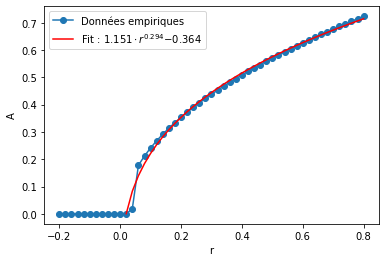

In [3]:
N = 1024
L = 100
x = np.linspace(0,L-L/N,N)
dt = 0.05
k = np.linspace(-N/2,N/2-1,N)
un0 = np.cos(2*np.pi*x/L) + 0.1*np.cos(4*np.pi*x/L)
uk0 = np.fft.fftshift(np.fft.fft(un0))
A = []
r = np.arange(-0.2, 0.82, 0.02)

for a in range(len(r)):
    if r[a] <= 0:
        Nt = int(200/dt)
        t = np.linspace(0,200,Nt)
        uk = np.zeros((Nt, N),dtype=complex)
        un = np.zeros((Nt, N))
        uk[0] = uk0
        un[0] = un0
        fl = r[a] - 1 + 2*((2*np.pi*k/L)**2) - ((2*np.pi*k/L)**4)
        Fu = np.fft.fftshift(np.fft.fft(un[0]**3))
        uk[1] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[0] + dt*((Fu)/(1-0.5*dt*fl))
        un[1] = (np.fft.ifft(np.fft.ifftshift(uk[1]))).real
        for i in range(2,Nt):
            Fu = np.fft.fftshift(np.fft.fft(un[i-1]**3))
            FuAv = np.fft.fftshift(np.fft.fft(un[i-2]**3))
            uk[i] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[i-1] - dt*((1.5*Fu-0.5*FuAv)/(1-0.5*dt*fl))
            un[i] = (np.fft.ifft(np.fft.ifftshift(uk[i]))).real
        A.append((np.mean(un[-1]**2))**0.5)
    elif 0<r[a]<0.12:
        Nt = int(400/dt)
        t = np.linspace(0,400,Nt)
        uk = np.zeros((Nt, N),dtype=complex)
        un = np.zeros((Nt, N))
        uk[0] = uk0
        un[0] = un0
        fl = r[a] - 1 + 2*((2*np.pi*k/L)**2) - ((2*np.pi*k/L)**4)
        Fu = np.fft.fftshift(np.fft.fft(un[0]**3))
        uk[1] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[0] + dt*((Fu)/(1-0.5*dt*fl))
        un[1] = (np.fft.ifft(np.fft.ifftshift(uk[1]))).real
        for i in range(2,Nt):
            Fu = np.fft.fftshift(np.fft.fft(un[i-1]**3))
            FuAv = np.fft.fftshift(np.fft.fft(un[i-2]**3))
            uk[i] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[i-1] - dt*((1.5*Fu-0.5*FuAv)/(1-0.5*dt*fl))
            un[i] = (np.fft.ifft(np.fft.ifftshift(uk[i]))).real
        A.append((np.mean(un[-1]**2))**0.5)
    elif 0.1<r[a]<0.22:
        Nt = int(300/dt)
        t = np.linspace(0,300,Nt)
        uk = np.zeros((Nt, N),dtype=complex)
        un = np.zeros((Nt, N))
        uk[0] = uk0
        un[0] = un0
        fl = r[a] - 1 + 2*((2*np.pi*k/L)**2) - ((2*np.pi*k/L)**4)
        Fu = np.fft.fftshift(np.fft.fft(un[0]**3))
        uk[1] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[0] + dt*((Fu)/(1-0.5*dt*fl))
        un[1] = (np.fft.ifft(np.fft.ifftshift(uk[1]))).real
        for i in range(2,Nt):
            Fu = np.fft.fftshift(np.fft.fft(un[i-1]**3))
            FuAv = np.fft.fftshift(np.fft.fft(un[i-2]**3))
            uk[i] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[i-1] - dt*((1.5*Fu-0.5*FuAv)/(1-0.5*dt*fl))
            un[i] = (np.fft.ifft(np.fft.ifftshift(uk[i]))).real
        A.append((np.mean(un[-1]**2))**0.5)
    elif 0.2<r[a]<0.32:
        Nt = int(200/dt)
        t = np.linspace(0,200,Nt)
        uk = np.zeros((Nt, N),dtype=complex)
        un = np.zeros((Nt, N))
        uk[0] = uk0
        un[0] = un0
        fl = r[a] - 1 + 2*((2*np.pi*k/L)**2) - ((2*np.pi*k/L)**4)
        Fu = np.fft.fftshift(np.fft.fft(un[0]**3))
        uk[1] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[0] + dt*((Fu)/(1-0.5*dt*fl))
        un[1] = (np.fft.ifft(np.fft.ifftshift(uk[1]))).real
        for i in range(2,Nt):
            Fu = np.fft.fftshift(np.fft.fft(un[i-1]**3))
            FuAv = np.fft.fftshift(np.fft.fft(un[i-2]**3))
            uk[i] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[i-1] - dt*((1.5*Fu-0.5*FuAv)/(1-0.5*dt*fl))
            un[i] = (np.fft.ifft(np.fft.ifftshift(uk[i]))).real
        A.append((np.mean(un[-1]**2))**0.5)
    elif 0.3<r[a]<0.62:
        Nt = int(100/dt)
        t = np.linspace(0,100,Nt)
        uk = np.zeros((Nt, N),dtype=complex)
        un = np.zeros((Nt, N))
        uk[0] = uk0
        un[0] = un0
        fl = r[a] - 1 + 2*((2*np.pi*k/L)**2) - ((2*np.pi*k/L)**4)
        Fu = np.fft.fftshift(np.fft.fft(un[0]**3))
        uk[1] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[0] + dt*((Fu)/(1-0.5*dt*fl))
        un[1] = (np.fft.ifft(np.fft.ifftshift(uk[1]))).real
        for i in range(2,Nt):
            Fu = np.fft.fftshift(np.fft.fft(un[i-1]**3))
            FuAv = np.fft.fftshift(np.fft.fft(un[i-2]**3))
            uk[i] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[i-1] - dt*((1.5*Fu-0.5*FuAv)/(1-0.5*dt*fl))
            un[i] = (np.fft.ifft(np.fft.ifftshift(uk[i]))).real
        A.append((np.mean(un[-1]**2))**0.5)
    elif 0.6<r[a]<0.72:
        Nt = int(75/dt)
        t = np.linspace(0,75,Nt)
        uk = np.zeros((Nt, N),dtype=complex)
        un = np.zeros((Nt, N))
        uk[0] = uk0
        un[0] = un0
        fl = r[a] - 1 + 2*((2*np.pi*k/L)**2) - ((2*np.pi*k/L)**4)
        Fu = np.fft.fftshift(np.fft.fft(un[0]**3))
        uk[1] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[0] + dt*((Fu)/(1-0.5*dt*fl))
        un[1] = (np.fft.ifft(np.fft.ifftshift(uk[1]))).real
        for i in range(2,Nt):
            Fu = np.fft.fftshift(np.fft.fft(un[i-1]**3))
            FuAv = np.fft.fftshift(np.fft.fft(un[i-2]**3))
            uk[i] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[i-1] - dt*((1.5*Fu-0.5*FuAv)/(1-0.5*dt*fl))
            un[i] = (np.fft.ifft(np.fft.ifftshift(uk[i]))).real
        A.append((np.mean(un[-1]**2))**0.5)
    elif 0.7<r[a]<0.82:
        Nt = int(50/dt)
        t = np.linspace(0,50,Nt)
        uk = np.zeros((Nt, N),dtype=complex)
        un = np.zeros((Nt, N))
        uk[0] = uk0
        un[0] = un0
        fl = r[a] - 1 + 2*((2*np.pi*k/L)**2) - ((2*np.pi*k/L)**4)
        Fu = np.fft.fftshift(np.fft.fft(un[0]**3))
        uk[1] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[0] + dt*((Fu)/(1-0.5*dt*fl))
        un[1] = (np.fft.ifft(np.fft.ifftshift(uk[1]))).real
        for i in range(2,Nt):
            Fu = np.fft.fftshift(np.fft.fft(un[i-1]**3))
            FuAv = np.fft.fftshift(np.fft.fft(un[i-2]**3))
            uk[i] = ((1+0.5*dt*fl)/(1-0.5*dt*fl))*uk[i-1] - dt*((1.5*Fu-0.5*FuAv)/(1-0.5*dt*fl))
            un[i] = (np.fft.ifft(np.fft.ifftshift(uk[i]))).real
        A.append((np.mean(un[-1]**2))**0.5)

plt.plot(r,A, '-o',label='Données empiriques')



r2 = []
A2 = []
for i in range(len(r)):
    if r[i]>0:
        r2.append(r[i])
        A2.append(A[i])

from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * ((x)**b) + c
popt, pcov = curve_fit(func, r2, A2)
plt.plot(r2, func(r2, *popt), 'r-', label='Fit : $%5.3f \cdot r^{%5.3f} {%5.3f}$' % tuple(popt))

plt.legend()
plt.xlabel('r')
plt.ylabel('A')
plt.show()